## MFA exploration in different combination

This notebook intends to explore MFA on various Project Days data with Different parameters (e.g. scaling, traning example),

In [35]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates



# Load Project days dataset file 
data_8nov = pd.read_csv('ProcessedData_ProjectDay_20171108.csv')
data_22nov = pd.read_csv('ProcessedData_ProjectDay_20171122.csv')
data_18oct = pd.read_csv('ProcessedData_ProjectDay_20171018.csv')

groups_info = {}

# combined data
data_all = data_8nov.append([data_22nov,data_18oct])


# MFA correlation with data seperately
def drawCorrelation(datafile,mfafile,date,dim=1):
    data = pd.read_csv(datafile)
    mfar = pd.read_csv(mfafile)
    mfar.drop(mfar.columns[0],axis=1,inplace=True)
    data['mfa-1'] = mfar.iloc[:,0]
    data['mfa-2'] = mfar.iloc[:,1]
    data.drop(data.columns[0:3],axis=1,inplace=True)
    fig, ax = plt.subplots()
    corr_matrix = data.corr()
    attr = [a for a in data.columns[0:10]]
    if dim == 1:
        ax.barh(np.arange(len(attr)),corr_matrix['mfa-1'][0:10])
    else:
        ax.barh(np.arange(len(attr)),corr_matrix['mfa-2'][0:10])
    ax.set_title('Correlation of MFA dim-%d with attributes %s'%(dim,date))
    ax.set_yticks(np.arange(len(attr)))
    ax.set_yticklabels(attr)
    #plt.savefig('Corr_MFA dim-%d for %s'%(dim,date))
    plt.show()
    
    
# MFA correlation for combined data
def drawCorrelation1(datafile,mfafile,date,dim=1):
    data = pd.read_csv(datafile)
    data = data.copy()
    mfar = pd.read_csv(mfafile)
    mfar.drop(mfar.columns[0],axis=1,inplace=True)
    data['mfa-1'] = mfar.iloc[:,0]
    data['mfa-2'] = mfar.iloc[:,1]
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    d = datetime.strptime(date,'%d-%m-%Y')
    temp_frame = data.loc[data['timestamp'].dt.day == d.day,:]
    
    temp_frame.drop(temp_frame.columns[0:4],axis=1,inplace=True)
    fig, ax = plt.subplots()
    corr_matrix = temp_frame.corr()
    attr = [a for a in temp_frame.columns[0:10]]
    if dim == 1:
        ax.barh(np.arange(len(attr)),corr_matrix['mfa-1'][0:10])
    else:
        ax.barh(np.arange(len(attr)),corr_matrix['mfa-2'][0:10])
    ax.set_title('Correlation of MFA dim-%d Date %s'%(dim,date))
    ax.set_yticks(np.arange(len(attr)))
    ax.set_yticklabels(attr)
    #plt.savefig('Corr_MFA dim-%d for %s'%(dim,date))
    plt.show()

## 1 MFA independently on each Project Days' Data
In this first scenario, MFA algorithm executed on each day data seperately. Hence, three MFA model built. This section will present the correlation of resultant dimensions with original attributes.
Note: No scaling is used in this scenario.

<img src="images/scenario_1.png"  width="400"/>

### 1.1 Project Days 18-10-2017 data

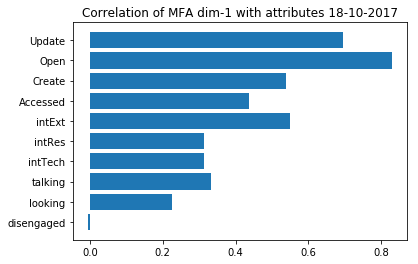

In [3]:
drawCorrelation('ProcessedData_ProjectDay_20171018.csv','1_scenario_18oct.csv','18-10-2017',dim=1)

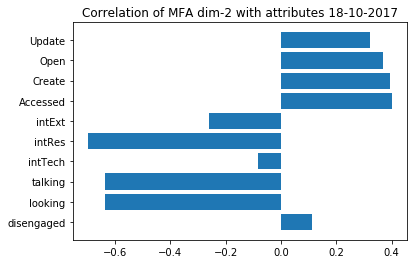

In [4]:
drawCorrelation('ProcessedData_ProjectDay_20171018.csv','1_scenario_18oct.csv','18-10-2017',dim=2)

### 1.2 Project Days 8-11-2017 data

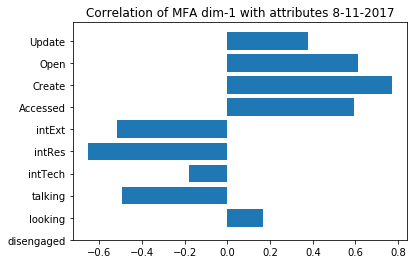

In [5]:
drawCorrelation('ProcessedData_ProjectDay_20171108.csv','1_scenario_8nov.csv','8-11-2017',dim=1)

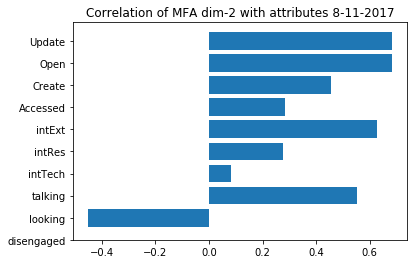

In [6]:
drawCorrelation('ProcessedData_ProjectDay_20171108.csv','1_scenario_8nov.csv','8-11-2017',dim=2)

### 1.3 Project Days 22-11-2017 data
For this case, we handled cases of missing values in two ways - by filling missing values with 0 and by removing entries having missing values.

#### 1.3.1 Filling with zero

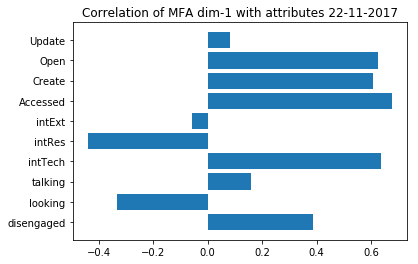

In [10]:
drawCorrelation('ProcessedData_ProjectDay_20171122.csv','1_scenario_22nov_fillna.csv','22-11-2017',dim=1)

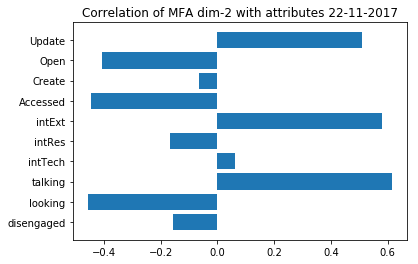

In [11]:
drawCorrelation('ProcessedData_ProjectDay_20171122.csv','1_scenario_22nov_fillna.csv','22-11-2017',dim=2)

#### 1.3.2 Removing missing entries

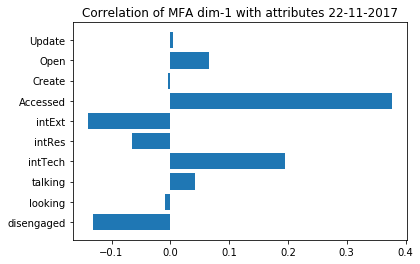

In [13]:
drawCorrelation('ProcessedData_ProjectDay_20171122.csv','1_scenario_22nov_dropna.csv','22-11-2017',dim=1)

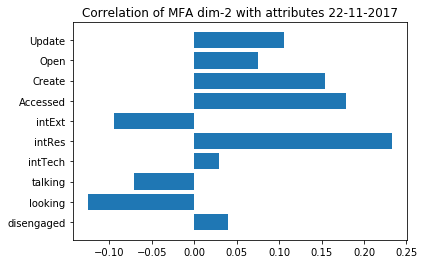

In [12]:
drawCorrelation('ProcessedData_ProjectDay_20171122.csv','1_scenario_22nov_dropna.csv','22-11-2017',dim=2)

<hr/>
<hr/>

## 2. MFA on combined data of three days
In this scenario, we combined three days data and applied MFA on this data to convert it into lower number dimensions. Data are not scaled in this scenario.
<img src="images/scenario_2a.png"  width="400"/>

### 2.1 Project days 18-10-2017 data

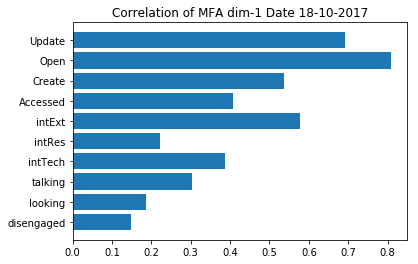

In [36]:
drawCorrelation1('2_scenario_data.csv','2_scenario_all.csv','18-10-2017',dim=1)

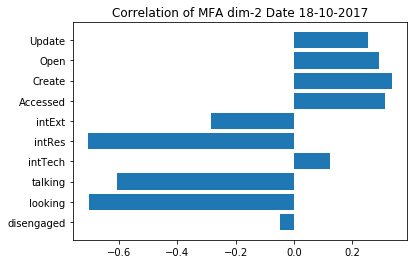

In [37]:
drawCorrelation1('2_scenario_data.csv','2_scenario_all.csv','18-10-2017',dim=2)

### 2.2 Project days 8-11-2017 data

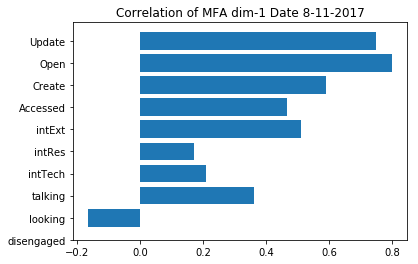

In [38]:
drawCorrelation1('2_scenario_data.csv','2_scenario_all.csv','8-11-2017',dim=1)

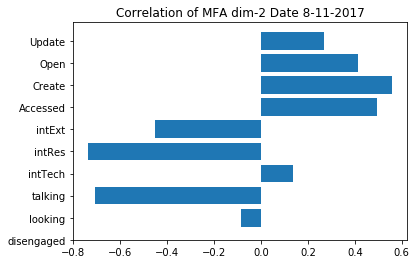

In [39]:
drawCorrelation1('2_scenario_data.csv','2_scenario_all.csv','8-11-2017',dim=2)

### 2.3 Project days 22-11-2017 data

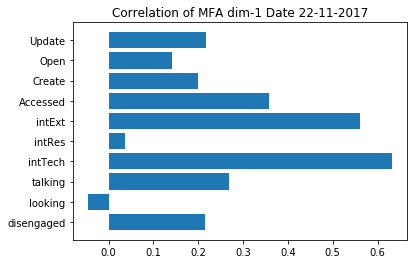

In [40]:
drawCorrelation1('2_scenario_data.csv','2_scenario_all.csv','22-11-2017',dim=1)

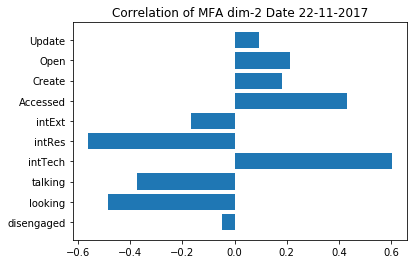

In [41]:
drawCorrelation1('2_scenario_data.csv','2_scenario_all.csv','22-11-2017',dim=2)

<hr/>
<hr/>


## 3. MFA on combined data of two days
In this scenario, MFA algorithm trained on two day data (18-10-2017 and 2-11-2017). This trained algorithm is then applied on 22-11-2017 day data to convert it into lower number of dimensions.
<img src="images/scenario_3a.png"  width="400"/>

### 3.1 Project days 18-10-2017 data

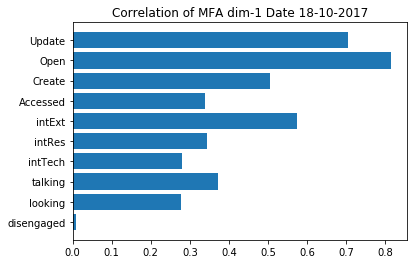

In [42]:
drawCorrelation1('3_scenario_data_18n8.csv','3_scenario_18n8.csv','18-10-2017',dim=1)

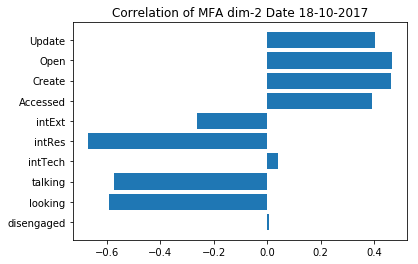

In [43]:
drawCorrelation1('3_scenario_data_18n8.csv','3_scenario_18n8.csv','18-10-2017',dim=2)

### 3.2 Project days 8-11-2017 data

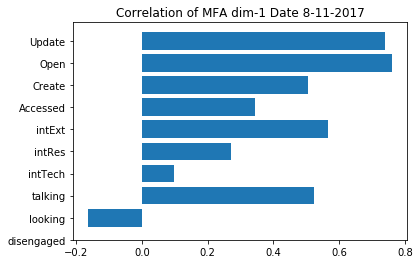

In [44]:
drawCorrelation1('3_scenario_data_18n8.csv','3_scenario_18n8.csv','8-11-2017',dim=1)

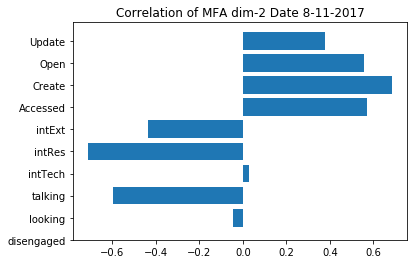

In [45]:
drawCorrelation1('3_scenario_data_18n8.csv','3_scenario_18n8.csv','8-11-2017',dim=2)

### 3.3 Project days 22-11-2017 data

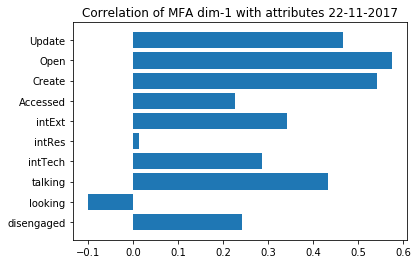

In [46]:
drawCorrelation('ProcessedData_ProjectDay_20171122.csv','3_scenario_22nov.csv','22-11-2017',dim=1)

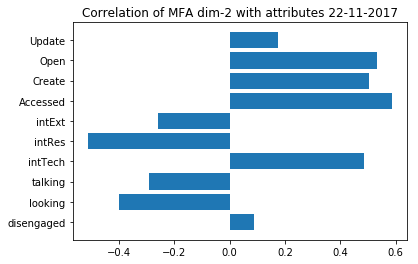

In [47]:
drawCorrelation('ProcessedData_ProjectDay_20171122.csv','3_scenario_22nov.csv','22-11-2017',dim=2)

<hr/><hr/>


## 4. MFA on combined data of two days with scaling
In this scenario, MFA algorithm trained on two day data (18-10-2017 and 2-11-2017). This trained algorithm is then applied on 22-11-2017 day data to convert it into lower number of dimensions. Data are scaled in this case.
<img src="images/scenario_4a.png"  width="400"/>

### 4.1 Project days 18-10-2017 data

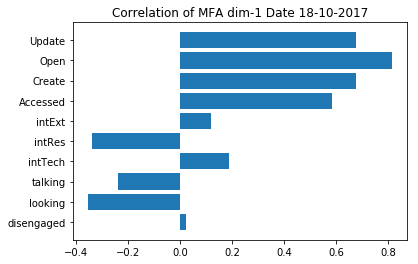

In [48]:
drawCorrelation1('4_scenario_data_18n8.csv','4_scenario_18n8.csv','18-10-2017',dim=1)

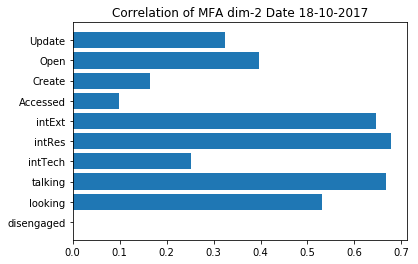

In [49]:
drawCorrelation1('4_scenario_data_18n8.csv','4_scenario_18n8.csv','18-10-2017',dim=2)

### 4.2 Project days 8-11-2017 data

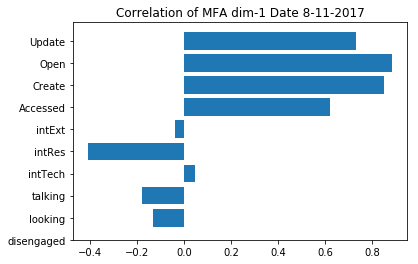

In [50]:
drawCorrelation1('4_scenario_data_18n8.csv','4_scenario_18n8.csv','8-11-2017',dim=1)

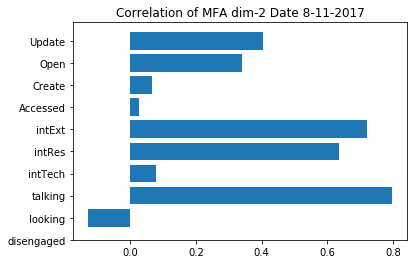

In [51]:
drawCorrelation1('4_scenario_data_18n8.csv','4_scenario_18n8.csv','8-11-2017',dim=2)

### 4.3 Project days 22-11-2017 data

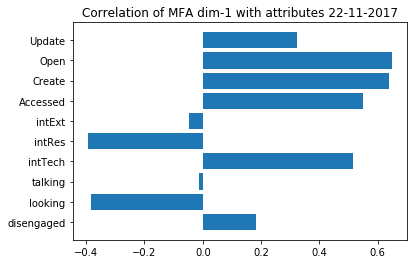

In [52]:
drawCorrelation('ProcessedData_ProjectDay_20171122.csv','4_scenario_22nov.csv','22-11-2017',dim=1)

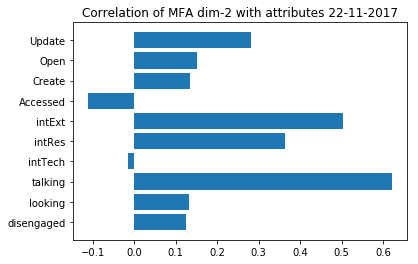

In [53]:
drawCorrelation('ProcessedData_ProjectDay_20171122.csv','4_scenario_22nov.csv','22-11-2017',dim=2)

<hr/><hr/>